rms : 센서데이터에서 특정 주기로 값을 추출하는데 주기사이 값들을 잘 설명할 수있는 값으로.. 양,음이 바뀌는 값들의 평균을 측정하는데엔 제곱 평균 제곱근이 최고.. root mean square

1. 라이브러리 호출
2. 데이터 불러오기
3. 변수 간 관계 확인 시각화

### 1. 라이브러리 호출

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler

### 2. 데이터 불러오기

In [49]:
df = pd.read_csv("C:/AI/vib_data_new.csv")
df_err = pd.read_csv("C:/AI/vib_data_err.csv")

In [3]:
df.head()

,s_measuretime,s_nodeid,s_volt,s_type,s_rmsx,s_rmsy,s_rmsz,s_temp,s_dir,v_type,v_lvol,v_rvol,v_ldir,v_rdir,vec,seta
0,2022-11-09 9:51,0,3,8,0.47323,0.35717,0.32355,23,0,1,1,0,0,0,0.675427,105.025
1,2022-11-09 9:52,0,3,8,0.47376,0.35143,0.31766,23,0,1,1,0,0,0,0.669970,104.944
2,2022-11-09 9:53,0,3,8,0.46836,0.35561,0.31594,23,0,1,1,0,0,0,0.667561,104.991
3,2022-11-09 9:54,0,3,8,0.47408,0.35575,0.31676,23,0,1,1,0,0,0,0.672047,104.947
4,2022-11-09 9:55,0,3,8,0.48104,0.35758,0.32425,23,0,1,1,0,0,0,0.681470,104.963


In [4]:
# 결측치, 형태 알 수 있음.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13217 entries, 0 to 13216
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   s_measuretime  13217 non-null  object 
 1   s_nodeid       13217 non-null  int64  
 2   s_volt         13217 non-null  int64  
 3   s_type         13217 non-null  int64  
 4   s_rmsx         13217 non-null  float64
 5   s_rmsy         13217 non-null  float64
 6   s_rmsz         13217 non-null  float64
 7   s_temp         13217 non-null  int64  
 8   s_dir          13217 non-null  int64  
 9   v_type         13217 non-null  int64  
 10  v_lvol         13217 non-null  int64  
 11  v_rvol         13217 non-null  int64  
 12  v_ldir         13217 non-null  int64  
 13  v_rdir         13217 non-null  int64  
 14  vec            13217 non-null  float64
 15  seta           13217 non-null  float64
dtypes: float64(5), int64(10), object(1)
memory usage: 1.6+ MB


### 3. 시각화

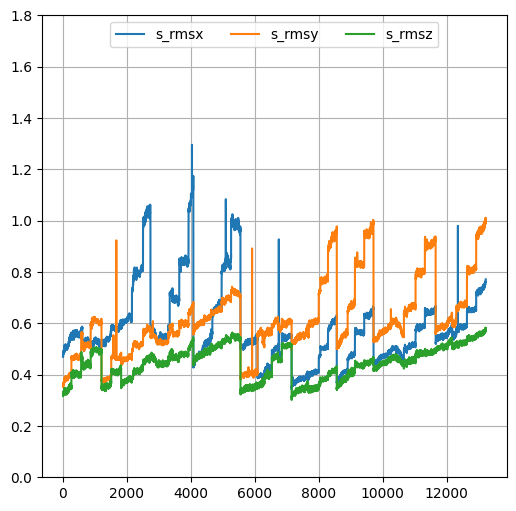

In [5]:
plt.figure(figsize=(6,6))

plt.plot(df['s_rmsx'], label='s_rmsx')
plt.plot(df['s_rmsy'], label='s_rmsy')
plt.plot(df['s_rmsz'], label='s_rmsz')
plt.ylim([0,1.8])
plt.legend(ncol=3, loc='upper center')
plt.grid()

plt.show()

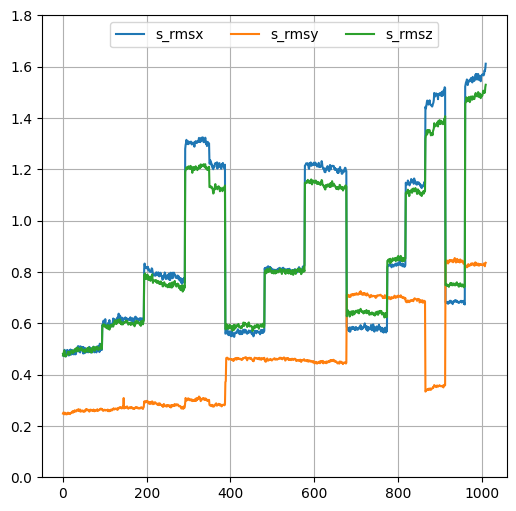

In [6]:
plt.figure(figsize=(6,6))

plt.plot(df_err['s_rmsx'], label='s_rmsx')
plt.plot(df_err['s_rmsy'], label='s_rmsy')
plt.plot(df_err['s_rmsz'], label='s_rmsz')
plt.ylim([0,1.8])
plt.legend(ncol=3, loc='upper center')
plt.grid()

plt.show()

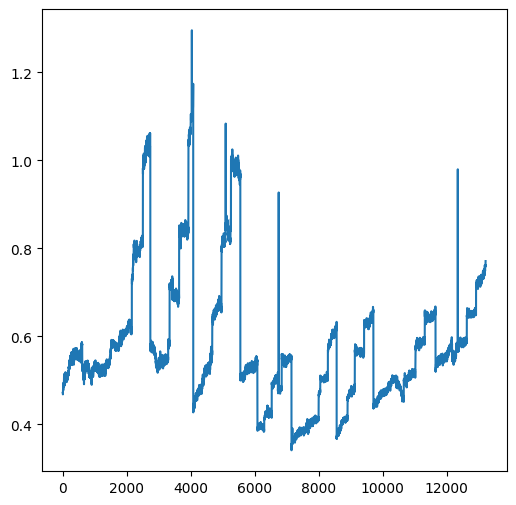

In [7]:
# rmsx 정상 그래프
plt.figure(figsize=(6,6))

plt.plot(df['s_rmsx'])

plt.show()

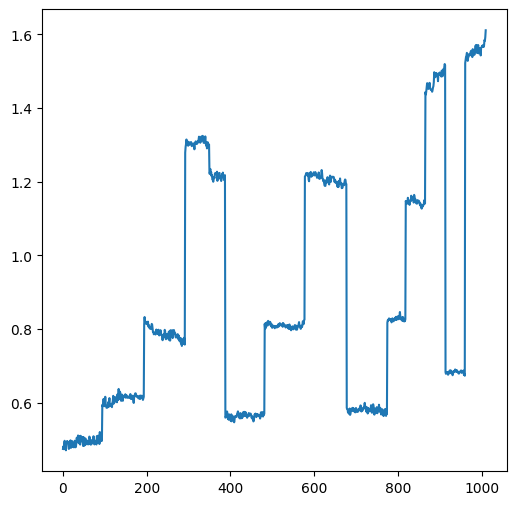

In [8]:
# rmsx 오류 그래프
plt.figure(figsize=(6,6))

plt.plot(df_err['s_rmsx'])

plt.show()

### 4. 데이터 전처리

In [9]:
df['s_measuretime'] = pd.to_datetime(df.s_measuretime, format='%Y-%m-%d %H:%M')  # 날짜 데이터는 데이터를 보고 형태 그대로 변환
df.index = df['s_measuretime']  # 유일성 확보, 접근성 
data = df.sort_index(ascending=True, axis=0)  # 행단위 오름차순 정렬하여 저장

In [10]:
# 날짜와 rmsx 데이터를 이용한 데이터프레임 생성
new_data = pd.DataFrame(index=range(0,len(df)), columns=['s_measuretime', 's_rmsx'])  # 빈 데이터프레임

# 데이터프레임 내용 채우기
for i in range(len(data)):  
    new_data['s_measuretime'][i] = data.index[i]
    new_data['s_rmsx'][i] = data['s_rmsx'][i]

# index 설정
new_data.index = new_data.s_measuretime  

# s_measure 열 삭제, 업데이트.
new_data.drop('s_measuretime',axis=1, inplace=True)  

# 값을 numpy 배열로 변환
final_data = new_data.values

In [11]:
new_data

,s_rmsx
s_measuretime,
2022-11-09 09:51:00,0.47323
2022-11-09 09:52:00,0.47376
2022-11-09 09:53:00,0.46836
2022-11-09 09:54:00,0.47408
2022-11-09 09:55:00,0.48104
...,...
2022-11-18 14:04:00,0.75974
2022-11-18 14:05:00,0.76098
2022-11-18 14:06:00,0.76473


In [12]:
final_data

array([[0.47323],
       [0.47376],
       [0.46836],
       ...,
       [0.76473],
       [0.76853],
       [0.77119]], dtype=object)

In [13]:
# 80%를 학습데이터, 20% 테스트데이터로 설정
train_idx = int(final_data.shape[0] * 0.8)
train_data = final_data[0:train_idx]
test_data = final_data[train_idx:]

In [14]:
train_data.shape

(10573, 1)

In [15]:
test_data.shape

(2644, 1)

In [16]:
# 정규화를 위한 객체 생성
scaler = MinMaxScaler(feature_range=(0,1))

# 정규화 적용
scaled_data = scaler.fit_transform(final_data)

In [17]:
scaled_data

array([[0.13823064],
       [0.13878612],
       [0.13312651],
       ...,
       [0.44374456],
       [0.44772725],
       [0.45051513]])

In [18]:
# 신경망에 입력하기 위한 데이터셋 생성
# 함수로 구현
# 학습데이터
def getDataSetX(item, start, to, size):  # 원시데이터, 데이터 시작, 데이터 끝, 입력데이터 개수
    
    arr = []  # 공백 리스트 생성
    
    for i in range(start, to - (size - 1)):
        arr.append(item[i:i + size, 0])
        
    nparr = np.array(arr)  # numpy배열로 변환
    nparr = np.reshape(nparr, (nparr.shape[0], nparr.shape[1], 1))  # 3차원으로 확장
    
    return nparr

# 정답데이터
def getDataSetY(item, start, to, size):
    arr = []
    for i in range(start + size, to + 1):
        arr.append(item[i, 0])
    nparr = np.array(arr)
    
    return nparr

In [19]:
tx = getDataSetX(scaled_data, 0, 10, 10)
print(tx)

[[[0.13823064]
  [0.13878612]
  [0.13312651]
  [0.1391215 ]
  [0.14641611]
  [0.14397409]
  [0.14632178]
  [0.14610168]
  [0.15145735]
  [0.14944504]]]


In [20]:
ty = getDataSetY(scaled_data, 0, 10, 10)
print(ty)

[0.14620649]


In [21]:
x_train = getDataSetX(scaled_data, 0, train_idx - 1, 10)
y_train = getDataSetY(scaled_data, 0, train_idx - 1, 10)
print(x_train.shape)
print(y_train.shape)

x_test = getDataSetX(scaled_data, train_idx, final_data.shape[0] - 1, 10)
y_test = getDataSetY(scaled_data, train_idx, final_data.shape[0] - 1, 10)
print(x_test.shape)
print(y_test.shape)

(10563, 10, 1)
(10563,)
(2634, 10, 1)
(2634,)


### 5. 모델 구성

In [22]:
lstm_model = Sequential([
    LSTM(units=10, return_sequences=True, input_shape=(x_train.shape[1],1)),
    LSTM(units=10),
    Dense(1)
])
lstm_model.compile(loss='mse', optimizer='adam')
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 10)            480       
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [23]:
history_lstm = lstm_model.fit(x_train, y_train, epochs=20, batch_size=32,
                              validation_split=0.2)

Epoch 1/20
265/265 [==============================] - 4s 7ms/step - loss: 0.0108 - val_loss: 4.0345e-04
Epoch 2/20
265/265 [==============================] - 1s 5ms/step - loss: 9.6807e-04 - val_loss: 4.2126e-04
Epoch 3/20
265/265 [==============================] - 1s 5ms/step - loss: 9.6603e-04 - val_loss: 4.0919e-04
Epoch 4/20
265/265 [==============================] - 1s 5ms/step - loss: 9.0556e-04 - val_loss: 4.1552e-04
Epoch 5/20
265/265 [==============================] - 1s 5ms/step - loss: 8.6234e-04 - val_loss: 4.0421e-04
Epoch 6/20
265/265 [==============================] - 1s 5ms/step - loss: 8.2833e-04 - val_loss: 3.3443e-04
Epoch 7/20
265/265 [==============================] - 1s 5ms/step - loss: 7.8569e-04 - val_loss: 3.1417e-04
Epoch 8/20
265/265 [==============================] - 1s 5ms/step - loss: 7.4420e-04 - val_loss: 3.0805e-04
Epoch 9/20
265/265 [==============================] - 1s 5ms/step - loss: 7.0092e-04 - val_loss: 2.8951e-04
Epoch 10/20
265/265 [===========

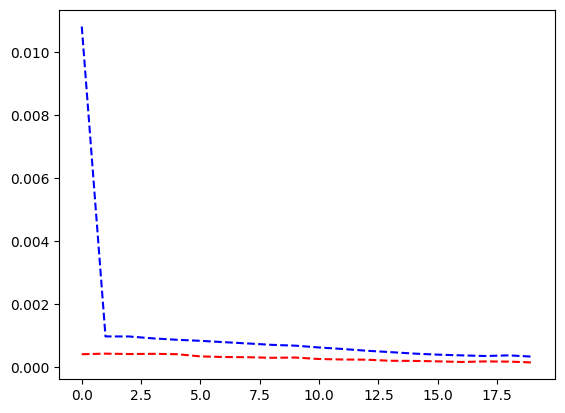

In [24]:
# 과적합 확인할 수 있음.
plt.plot(history_lstm.history['loss'], 'b--', label='loss')
plt.plot(history_lstm.history['val_loss'], 'r--', label='val_loss')
plt.show()

### 6. 예측

In [25]:
pred_s_rmsx = lstm_model.predict(x_test)  # 테스트 데이터셋으로 예측(정규화값)
pred_s_rmsx = scaler.inverse_transform(pred_s_rmsx)  # 정규화데이터로 역변환

In [26]:
# 차원 일치 후 비교.
test_data[10:,0]  # 정답
pred_s_rmsx[:,0]  # 예측

# MAPE (Mean Absolute Percentage Error)
print((np.mean(np.abs(test_data[10:,0] - pred_s_rmsx[:,0]) / test_data[10:,0]) * 100))

0.7094936958367686


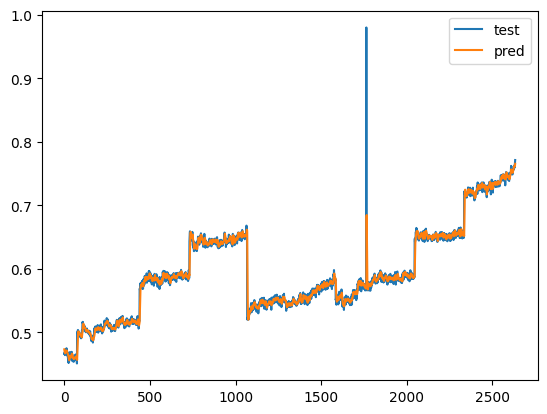

In [27]:
plt.plot(test_data[10:,0],label='test')  # 정답
plt.plot(pred_s_rmsx[:,0], label='pred') # 예측
plt.legend()
plt.show()

# error 데이터

In [28]:
df_err = pd.read_csv("C:/AI/vib_data_err.csv")

In [29]:
df_err

,s_measuretime,s_nodeid,s_volt,s_type,s_rmsx,s_rmsy,s_rmsz,s_temp,s_dir,v_type,v_lvol,v_rvol,v_ldir,v_rdir,vec,seta
0,2022-11-23 10:05,0,3,8,0.47470,0.24819,0.48077,23,0,5,1,1,0,90,0.719776,103.342
1,2022-11-23 10:06,0,3,8,0.48144,0.25221,0.47297,23,0,2,1,1,0,90,0.720482,103.451
2,2022-11-23 10:07,0,3,8,0.47380,0.25211,0.48737,23,0,5,1,1,0,90,0.724966,103.402
3,2022-11-23 10:08,0,3,8,0.49006,0.25174,0.49410,23,0,5,1,1,0,90,0.740045,103.242
4,2022-11-23 10:09,0,3,8,0.49657,0.24527,0.49117,23,0,2,1,1,0,90,0.740262,103.047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,2022-11-24 2:50,0,3,8,1.56989,0.83313,1.49746,26,0,2,6,6,0,90,2.324010,103.617
1007,2022-11-24 2:51,0,3,8,1.58473,0.83097,1.50204,26,0,2,6,6,0,90,2.336240,103.559
1008,2022-11-24 2:52,0,3,8,1.58261,0.82226,1.49865,26,0,2,6,6,0,90,2.329530,103.504
1009,2022-11-24 2:53,0,3,8,1.59269,0.83338,1.52013,26,0,2,6,6,0,90,2.354140,103.527


In [30]:
# 날짜데이터를 날짜형식으로 변환
df_err['s_measuretime'] = pd.to_datetime(df_err.s_measuretime, format = '%Y-%m-%d %H:%M')

# 유일성, 접근성 => 인덱스
df_err.index = df_err['s_measuretime']

# 오름차순 정렬
data_err = df_err.sort_index(ascending=True, axis=0)

In [31]:
# 빈 데이터프레임 생성
new_data_err = pd.DataFrame(index=range(0,len(df_err)), columns=['s_measuretime', 's_rmsx'])

# 데이터프레임 내용 채우기
for i in range(len(data_err)):
    new_data_err['s_measuretime'][i] = data_err.index[i]
    new_data_err['s_rmsx'][i] = data_err['s_rmsx'][i]
    
# index 설정
new_data_err.index = new_data_err['s_measuretime']

# 열 삭제, 업데이트
new_data_err.drop('s_measuretime', axis=1, inplace=True)

# 값을 numpy 배열로 변환
final_data_err = new_data_err.values

In [32]:
new_data_err

,s_rmsx
s_measuretime,
2022-11-23 10:05:00,0.4747
2022-11-23 10:06:00,0.48144
2022-11-23 10:07:00,0.4738
2022-11-23 10:08:00,0.49006
2022-11-23 10:09:00,0.49657
...,...
2022-11-24 02:50:00,1.56989
2022-11-24 02:51:00,1.58473
2022-11-24 02:52:00,1.58261


In [33]:
final_data_err

array([[0.4747],
       [0.48144],
       [0.4738],
       ...,
       [1.58261],
       [1.59269],
       [1.61124]], dtype=object)

In [34]:
# 정규화를 위한 객체 생성
scaler_err = MinMaxScaler(feature_range=(0,1))

# 정규화 적용
scaled_data_err = scaler_err.fit_transform(final_data_err)

In [35]:
scaled_data_err

array([[0.00340226],
       [0.00931236],
       [0.00261307],
       ...,
       [0.97489521],
       [0.98373406],
       [1.        ]])

In [36]:
# 신경망에 입력하기 위한 데이터셋 생성
# 함수로 구현
# 학습데이터
def getDataSetX(item, start, to, size):  # 원시데이터, 데이터 시작, 데이터 끝, 입력데이터 개수
    
    arr = []  # 공백 리스트 생성
    
    for i in range(start, to - (size - 1)):
        arr.append(item[i:i + size, 0])
        
    nparr = np.array(arr)  # numpy배열로 변환
    nparr = np.reshape(nparr, (nparr.shape[0], nparr.shape[1], 1))  # 3차원으로 확장
    
    return nparr

# 정답데이터
def getDataSetY(item, start, to, size):
    arr = []
    for i in range(start + size, to + 1):
        arr.append(item[i, 0])
    nparr = np.array(arr)
    
    return nparr

In [37]:
x_test_err = getDataSetX(scaled_data_err, 0, final_data_err.shape[0] - 1, 10)
y_test_err = getDataSetY(scaled_data_err, 0, final_data_err.shape[0] - 1, 10)

In [38]:
x_test_err.shape

(1001, 10, 1)

In [39]:
y_test_err.shape

(1001,)

In [40]:
print(x_test_err)
print(y_test_err)

[[[0.00340226]
  [0.00931236]
  [0.00261307]
  ...
  [0.        ]
  [0.0142316 ]
  [0.01825643]]

 [[0.00931236]
  [0.00261307]
  [0.01687098]
  ...
  [0.0142316 ]
  [0.01825643]
  [0.0221585 ]]

 [[0.00261307]
  [0.01687098]
  [0.0225794 ]
  ...
  [0.01825643]
  [0.0221585 ]
  [0.01916838]]

 ...

 [[0.94014486]
  [0.95778748]
  [0.95955876]
  ...
  [0.96020764]
  [0.96374143]
  [0.97675418]]

 [[0.95778748]
  [0.95955876]
  [0.96216306]
  ...
  [0.96374143]
  [0.97675418]
  [0.97489521]]

 [[0.95955876]
  [0.96216306]
  [0.96100559]
  ...
  [0.97675418]
  [0.97489521]
  [0.98373406]]]
[0.0221585  0.01916838 0.02004525 ... 0.97489521 0.98373406 1.        ]


### 모델 구성

In [41]:
pred_s_rmsx_err = lstm_model.predict(x_test_err)  # 테스트 데이터셋으로 예측(정규화값)
pred_s_rmsx_err = scaler_err.inverse_transform(pred_s_rmsx_err)  # 정규화데이터로 역변환

In [43]:
pred_s_rmsx_err.shape

(1001, 1)

In [44]:
test_data_err = final_data_err[0:]
# 차원 일치 후 비교.
test_data_err[10:,0]
pred_s_rmsx_err[:,0]  # 예측

# MAPE (Mean Absolute Percentage Error)
print((np.mean(np.abs(test_data_err[10:,0] - pred_s_rmsx_err[:,0]) / test_data_err[10:,0]) * 100))

2.411818950043334


In [45]:
test_data_err

array([[0.4747],
       [0.48144],
       [0.4738],
       ...,
       [1.58261],
       [1.59269],
       [1.61124]], dtype=object)

In [46]:
pred_s_rmsx_err

array([[0.49015173],
       [0.49243128],
       [0.4943035 ],
       ...,
       [1.5373602 ],
       [1.5417032 ],
       [1.5489708 ]], dtype=float32)

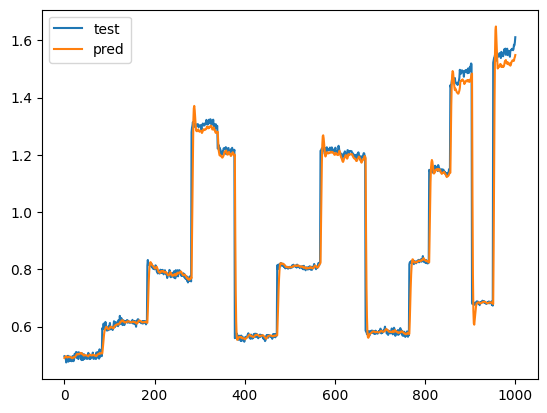

In [47]:
plt.plot(test_data_err[10:,0],label='test')  # 정답
plt.plot(pred_s_rmsx_err[:,0], label='pred') # 예측
plt.legend()
plt.show()